# Statistics - Week 7


*   Non-parametric tests
*   Bootstrap
*   Jackknife


## Kolmogorov-Smirnov Test

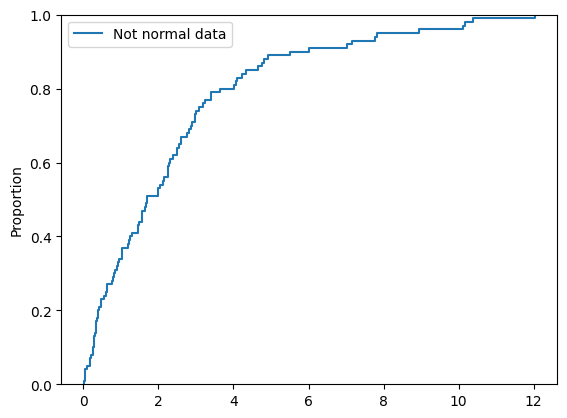

In [ ]:
from numpy.random import seed
from numpy.random import poisson
from numpy.random import randn
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

seed(0)

# generate dataset of 100 values that follow exponential distribution
not_norm_data = np.random.exponential(scale = 2.7, size = 100)

p = sns.ecdfplot(data = not_norm_data, label = 'Not normal data')
plt.legend()
None

But... do you remember how to calculate empirical cumulative distribution function?

***If your dataset contains 5 values: (4, 0, 2, 3, 2)***

Let us firstly test the following hypotheses:

$H_0:\text{a given sample follows normal distribution}$

$H_1:\text{a given sample does not follow normal distribution}$


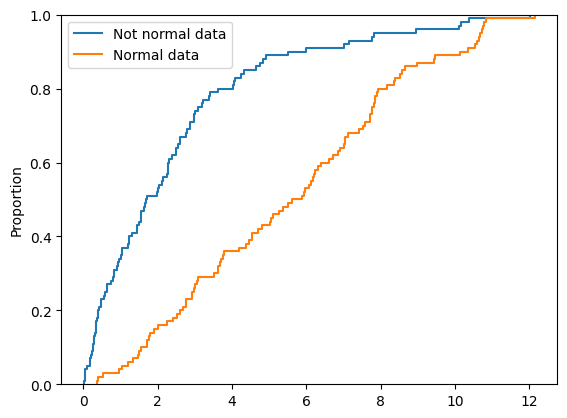

In [ ]:
# generate dataset of 100 values that follow normal distribution
norm_data = np.random.normal(5, 3, 100)

p1 = sns.ecdfplot(data = not_norm_data, label = 'Not normal data')
p2 = sns.ecdfplot(data = norm_data, label = 'Normal data')
plt.legend()
None

In [ ]:
from scipy.stats import kstest

# perform Kolmogorov-Smirnov test for 1 sample
_, p_value = kstest((not_norm_data - np.mean(not_norm_data))/np.std(not_norm_data), 'norm')

if p_value < 0.05:
  print("p-value is equal to {}, so we can reject the null hypothesis".format(p_value))
else:
  print("p-value is equal to {}, so we cannot reject the null hypothesis".format(p_value))

p-value is equal to 0.007514112662650111, so we can reject the null hypothesis


Let us now test the following hypotheses:

$H_0:\text{given two samples follow the same distribution}$

$H_1:\text{given two samples do not follow the same distribution}$


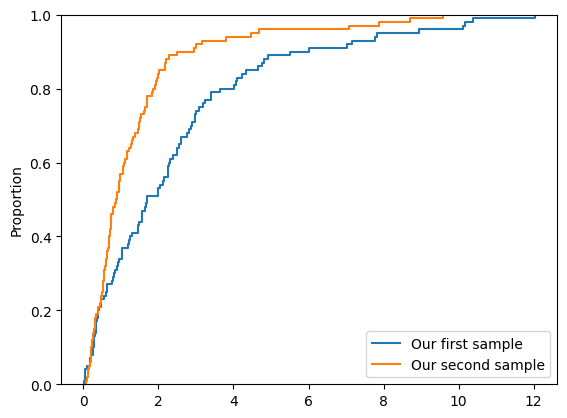

In [ ]:
# generate dataset of 100 values that follow normal distribution
some_sample = np.random.lognormal(0, 1, 100)

p1 = sns.ecdfplot(data = not_norm_data, label = 'Our first sample')
p2 = sns.ecdfplot(data = some_sample, label = 'Our second sample')
plt.legend()
None

In [ ]:
from scipy.stats import ks_2samp

# perform Kolmogorov-Smirnov test for 2 samples
_, p_value = ks_2samp(not_norm_data, norm_data)

if p_value < 0.05:
  print("p-value is equal to {}, so we can reject the null hypothesis".format(p_value))
else:
  print("p-value is equal to {}, so we cannot reject the null hypothesis".format(p_value))

p-value is equal to 1.0024645454361508e-11, so we can reject the null hypothesis


Let's consider the opposite situation.

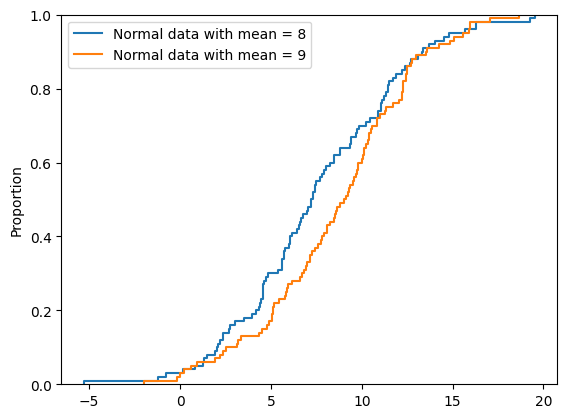

In [ ]:
norm_data1 = np.random.normal(8, 5, 100)
norm_data2 = np.random.normal(9, 4, 100)

p1 = sns.ecdfplot(data = norm_data1, label = 'Normal data with mean = 8')
p2 = sns.ecdfplot(data = norm_data2, label = 'Normal data with mean = 9')
plt.legend()


We have the following hypotheses:

$H_0:\text{given two samples follow the same distribution}$

$H_1:\text{given two samples do not follow the same distribution}$


In [ ]:
# perform Kolmogorov-Smirnov test for 2 samples
_, p_value = ks_2samp(norm_data1, norm_data2)

if p_value < 0.05:
  print("p-value is equal to {}, so we can reject the null hypothesis".format(p_value))
else:
  print("p-value is equal to {}, so we cannot reject the null hypothesis".format(p_value))

p-value is equal to 0.07822115797841851, so we cannot reject the null hypothesis


If you want to compare your data with normal distribution you can use  Shapiro-Wilk test or Anderson-Darling test:

*   https://builtin.com/data-science/shapiro-wilk-test
*   https://www.sciencedirect.com/topics/mathematics/wilk-test
*   https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test


## Sign Test

The Sign Test is a statistical method to test for consistent differences between pairs of observations, such as the weight of subjects before and after treatment. Given pairs of observations (such as weight pre- and post-treatment) for each subject, the sign test determines if one member of the pair (such as pre-treatment) tends to be greater than (or less than) the other member of the pair (such as post-treatment).

The paired observations may be designated $x$ and $y$. For comparisons of paired observations $(x, y)$, the sign test is most useful if comparisons can only be expressed as $x > y$, $x = y$, or $x < y$. If, instead, the observations can be expressed as numeric quantities $(x = 7, y = 18)$, or as ranks $(\text{rank of } x = 1 \text{st}, \text{rank of } y = 8 \text{th})$, then the paired t-test or the Wilcoxon signed-rank test will usually have greater power than the sign test to detect consistent differences.

If $X$ and $Y$ are quantitative variables, the sign test can be used to test the hypothesis that the difference between the $X$ and $Y$ has zero median, assuming continuous distributions of the two random variables $X$ and $Y$, in the situation when we can draw paired samples from $X$ and $Y$.

The sign test can also test if the median of a collection of numbers is significantly greater than or less than a specified value. For example, given a list of student grades in a class, the sign test can determine if the median grade is significantly different from, say, 75 out of 100.

Let $p = Pr(X > Y)$, and then test the null hypothesis $H_0: p = 0.5$. In other words, the null hypothesis states that given a random pair of measurements $(x_i, y_i)$, then $x_i$ and $y_i$ are equally likely to be larger than the other.

To test the null hypothesis, independent pairs of sample data are collected from the populations $\{ (x_1, y_1), (x_2, y_2), \ldots , (x_n, y_n) \}$. Pairs are omitted for which there is no difference so that there is a possibility of a reduced sample of $m$ pairs.

Then let $W$ be the number of pairs for which $y_i − x_i > 0$. Assuming that $H_0$ is true, then $W$ follows a binomial distribution $W \sim b(m, 0.5)$. Since the test statistic is expected to follow a binomial distribution, the standard binomial test is used to calculate significance. The normal approximation to the binomial distribution can be used for large sample sizes, $m > 25$. The left-tail value is computed by $Pr(W \leqslant w)$, which is the p-value for the alternative $H_1: p < 0.5$. This alternative means that the $Y$ measurements tend to be higher.

The right-tail value is computed by $Pr(W \geqslant w)$, which is the p-value for the alternative $H_1: p > 0.5$. This alternative means that the $X$ measurements tend to be higher.

For a two-sided alternative $H_1$ the p-value is twice the smaller tail-value.

[Sherwin, 2004](https://www.researchgate.net/publication/223943824_Mirrors_as_potential_environmental_enrichment_for_individually_housed_laboratory_mice): sixteen mice were placed into apparatus comprised of two preference cages connected by a tunnel. A mirror was placed in one of the preference cages (mirror) but not in the other (non-mirror) and the position swapped daily for 4 days. To determine whether the mice had any preferences about mirrors, the proportion of time each mouse spent in each of its two cages was measured.


In [ ]:
import pandas as pd

mouse_data = pd.read_csv('https://raw.githubusercontent.com/demidovakatya/mashinnoye-obucheniye/master/4-stats-for-data-analysis/week_2/mirror_mouses.txt', header = None)
mouse_data

,0
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444
5,0.426292
6,0.417156
7,0.477977
8,0.450657
9,0.476602


In [ ]:
mouse_data.describe()

,0
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


$H_0:\text{the median of the proportion of time spent in a cage with a mirror is 0.5}$

$H_1:\text{the median of the proportion of time spent in a cage with a mirror is not 0.5}$

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

# perform sign test for 1 sample
_, p_value = sign_test(mouse_data, 0.5)

if p_value < 0.05:
  print("p-value is equal to {}, so we can reject the null hypothesis".format(p_value))
else:
  print("p-value is equal to {}, so we cannot reject the null hypothesis".format(p_value))

p-value is equal to 0.021270751953125, so we can reject the null hypothesis


## Wilcoxon Test

The study evaluates the effectiveness of behavioral therapy for the treatment of anorexia. For 50 patients, the weight is known before and after therapy. Was the therapy effective?

In [ ]:
weight = pd.read_csv('https://raw.githubusercontent.com/demidovakatya/mashinnoye-obucheniye/master/4-stats-for-data-analysis/week_2/weight.txt', sep = '\t', header = 0)
weight

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4
5,88.7,103.6
6,94.9,98.4
7,76.3,93.4
8,81.0,73.4
9,80.5,82.1


$H_0:\text{the weight of people before and after therapy is the same}$

$H_1:\text{the weight of people before and after therapy is not the same}$

In [ ]:
weight['Before'].describe()

count    29.000000
mean     82.689655
std       4.845495
min      70.000000
25%      80.400000
50%      82.600000
75%      85.000000
max      94.900000
Name: Before, dtype: float64

In [ ]:
weight['After'].describe()

count     29.000000
mean      85.696552
std        8.351924
min       71.300000
25%       81.900000
50%       83.900000
75%       90.900000
max      103.600000
Name: After, dtype: float64

In [ ]:
from scipy.stats import wilcoxon

_, p_value = wilcoxon(weight['Before'], weight['After'])

if p_value < 0.05:
  print("p-value is equal to {}, so we can reject the null hypothesis".format(p_value))
else:
  print("p-value is equal to {}, so we cannot reject the null hypothesis".format(p_value))

p-value is equal to 0.0622917003929615, so we cannot reject the null hypothesis


In [ ]:
from scipy.stats import ttest_rel

_, p_value = ttest_rel(weight['Before'], weight['After'])

if p_value < 0.05:
  print("p-value is equal to {}, so we can reject the null hypothesis".format(p_value))
else:
  print("p-value is equal to {}, so we cannot reject the null hypothesis".format(p_value))

p-value is equal to 0.03502259756218884, so we can reject the null hypothesis


In [ ]:
kstest((weight['Before'] - np.mean(weight['Before']))/np.std(weight['Before']), 'norm')[1], kstest((weight['After'] - np.mean(weight['After']))/np.std(weight['After']), 'norm')[1]

(0.6900400292481117, 0.4061716934615527)

We suspect the data to follow the norm distribution, since p value = 0.69 and p value = 0.4 > 0.05. We cannot reject $H_0$ hypothesis.

(array([2., 1., 1., 1., 0., 0., 7., 3., 4., 1., 0., 1., 1., 1., 1., 2., 1.,
        0., 1., 1.]),
 array([ 71.3  ,  72.915,  74.53 ,  76.145,  77.76 ,  79.375,  80.99 ,
         82.605,  84.22 ,  85.835,  87.45 ,  89.065,  90.68 ,  92.295,
         93.91 ,  95.525,  97.14 ,  98.755, 100.37 , 101.985, 103.6  ]),
 <BarContainer object of 20 artists>)

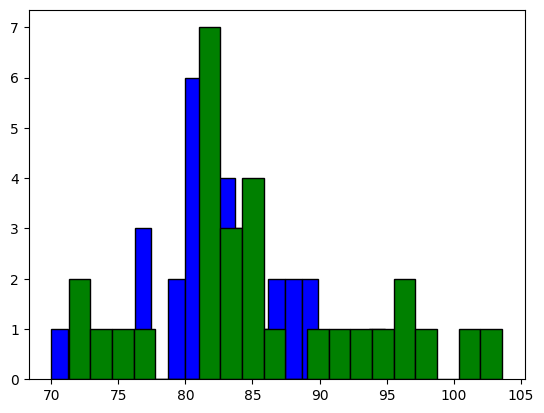

In [ ]:
plt.hist(weight['Before'], color = 'blue', edgecolor = 'black', bins = 20)
plt.hist(weight['After'], color = 'green', edgecolor = 'black', bins = 20)

## Mann-Whitney U Test

Are the median real estate values different in 2001 and 2002 in Seattle?

In [ ]:
seattle_data = pd.read_csv('https://raw.githubusercontent.com/demidovakatya/mashinnoye-obucheniye/master/4-stats-for-data-analysis/week_2/seattle.txt', sep = '\t', header = 0)
seattle_data

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002
...,...,...
95,239.0,2001
96,710.0,2001
97,172.0,2001
98,228.5,2001


In [ ]:
price2001 = seattle_data.loc[seattle_data['Year']  == 2001, 'Price']
price2002 = seattle_data.loc[seattle_data['Year']  == 2002, 'Price']

$H_0:\text{the medians of prices are equal in 2001 and 2002}$

$H_1:\text{the medians of prices are equal in 2001 and 2002}$

In [ ]:
price2001.describe()

count     50.000000
mean     288.926540
std      157.777757
min       50.000000
25%      190.250000
50%      260.800000
75%      406.737500
max      710.000000
Name: Price, dtype: float64

In [ ]:
price2002.describe()

count      50.000000
mean      329.257140
std       316.830045
min        50.000000
25%       176.200000
50%       244.925000
75%       328.625000
max      1850.000000
Name: Price, dtype: float64

In [ ]:
from scipy.stats import mannwhitneyu

_, p_value = mannwhitneyu(price2001, price2002)

if p_value < 0.05:
  print("p-value is equal to {}, so we can reject the null hypothesis".format(p_value))
else:
  print("p-value is equal to {}, so we cannot reject the null hypothesis".format(p_value))

p-value is equal to 0.7563872675701748, so we cannot reject the null hypothesis


## Bootstrap approach

In statistics, Bootstrap Sampling is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a population parameter.

This basically means that bootstrap sampling is a technique using which you can estimate parameters like mean for an entire population without explicitly considering each and every data point in the population.

Instead of looking at the entire population, we look at multiple subsets all of the same size taken from the population.

For example, if your population size is 1000. Then to find the mean, instead of considering all the 1000 entries you can take 50 samples of size 4 each and calculate the mean for each sample. This way you will be taking an average of 200 entries (50 x 4) chosen randomly.

A similar strategy is used by market researchers to carry out research in a huge population.

Bootstrapping is a method that can be used to construct a confidence interval for a statistic when the sample size is small and the underlying distribution is unknown.

The basic process for bootstrapping is as follows:

*   Take $k$ repeated samples with replacement from a given dataset.
*   For each sample, calculate the statistic you're interested in.
*   This results in $k$ different estimates for a given statistic, which you can then use to calculate a confidence interval for the statistic.

The following example shows how to use this procedure in practice.


In [ ]:
import numpy as np

ages = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

num_samples = 1000

bootstrap_means = np.zeros(num_samples)

# Perform bootstrap sampling
for i in range(num_samples):

    bootstrap_sample = np.random.choice(ages, size = len(ages), replace = True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means[i] = bootstrap_mean

estimated_mean = np.mean(bootstrap_means)
estimated_std = np.std(bootstrap_means, ddof = 1)


print("Estimated population mean age: ", estimated_mean)
print("Standard error of the estimate: ", estimated_std)

Estimated population mean age:  47.6575
Standard error of the estimate:  4.427363244109896


In [ ]:
# Bootstrap sampling for confidence intervals:

data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
num_samples = 1000

bootstrap_means = np.zeros(num_samples)

# Perform bootstrap sampling
for i in range(num_samples):
    bootstrap_sample = np.random.choice(data, size = len(data), replace = True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means[i] = bootstrap_mean

confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print("95% Confidence interval: ", confidence_interval)

95% Confidence interval:  [36. 72.]


For a 95% confidence interval we can find the middle 95% bootstrap statistics. This is known as the percentile method. This is the preferred method because it works regardless of the shape of the sampling distribution.

Regardless of the shape of the bootstrap sampling distribution, we can use the percentile method to construct a confidence interval. Using this method, the 95% confidence interval is the range of points that cover the middle 95% of bootstrap sampling distribution.

We determine the mean of each sample, call it $\overline{X}$, and create the sampling distribution of the mean. We then take the $\frac{\alpha}{2}$ and $1 - \frac{\alpha}{2}$ percentiles (e.g. the 0.0251000 and 0.9751000 = 25th and 975th bootstrapped statistic), and these are the confidence limits.

The above code performs bootstrap sampling to estimate a 95% confidence interval for the population mean of the original sample. We define an original sample data and also set the number of bootstrap samples to generate num_samples.bootstrap_means is to initialize an array to store the mean of the sample. To resample with replacement from the original samples so that a bootstrap sample is generated we define bootstrap_sample. And to calculate the mean of Bootstrap mean we define bootstrap_mean. At last, we calculate a 95% confidence interval by taking the 2.5th and 97.5th percentiles of the mean ages of the bootstrap samples.


In [ ]:
group1 = np.random.normal(0, 10, 12)
group2 = np.random.lognormal(0, 1, 10)
print(np.std(group1))
for num_resamples in range(10, 1100, 50):
  # print(group1, group2)

  bootstrap_diffs = np.zeros(num_samples)

  # Perform bootstrap sampling
  bootstrap_std = []
  for i in range(num_samples):
      bootstrap_group1 = np.random.choice(group1, size = len(group1), replace = True)
      bootstrap_group2 = np.random.choice(group2, size = len(group2), replace = True)

      bootstrap_diff = np.mean(bootstrap_group1) - np.mean(bootstrap_group2)
      bootstrap_diffs[i] = bootstrap_diff

      bootstrap_std.append(np.std(bootstrap_group1))

  p_value = np.mean(bootstrap_diffs >= np.mean(group1) - np.mean(group2))

  print("Bootstrap.", ' resamples: ', num_resamples,  "p-value: ", p_value, ' b_std: ', np.mean(bootstrap_std))

5.548019909027068
Bootstrap.  resamples:  10 p-value:  0.5  b_std:  5.160504503539058
Bootstrap.  resamples:  60 p-value:  0.529  b_std:  5.245051888560305
Bootstrap.  resamples:  110 p-value:  0.491  b_std:  5.203597478824015
Bootstrap.  resamples:  160 p-value:  0.495  b_std:  5.189089460999759
Bootstrap.  resamples:  210 p-value:  0.467  b_std:  5.2382784071254145
Bootstrap.  resamples:  260 p-value:  0.523  b_std:  5.204130550814609
Bootstrap.  resamples:  310 p-value:  0.511  b_std:  5.188224501905843
Bootstrap.  resamples:  360 p-value:  0.496  b_std:  5.2113949637127055
Bootstrap.  resamples:  410 p-value:  0.527  b_std:  5.208088262123873
Bootstrap.  resamples:  460 p-value:  0.546  b_std:  5.206608521334327
Bootstrap.  resamples:  510 p-value:  0.492  b_std:  5.257472600398859
Bootstrap.  resamples:  560 p-value:  0.516  b_std:  5.252403098751607
Bootstrap.  resamples:  610 p-value:  0.48  b_std:  5.217396296473811
Bootstrap.  resamples:  660 p-value:  0.492  b_std:  5.2769341

In [ ]:
group1 = [10, 12, 15, 18, 20]
group2 = [8, 11, 13, 16, 19]

num_samples = 1000

bootstrap_diffs = np.zeros(num_samples)

# Perform bootstrap sampling
for i in range(num_samples):
    bootstrap_group1 = np.random.choice(group1, size = len(group1), replace = True)
    bootstrap_group2 = np.random.choice(group2, size = len(group2), replace = True)

    bootstrap_diff = np.mean(bootstrap_group1) - np.mean(bootstrap_group2)
    bootstrap_diffs[i] = bootstrap_diff

p_value = np.mean(bootstrap_diffs >= np.mean(group1) - np.mean(group2))

print("Bootstrap p-value: ", p_value)

Bootstrap p-value:  0.519


In this example we perform a two-sample bootstrap hypothesis test to determine whether there is a significant difference between the means of two independent groups. We define two groups, group 1 and group 2. We set the number of bootstrap samples to be generated to 1000 at variable num_samples. To initialize an array to store the difference in means of each bootstrap sample we define np.zeros(num_samples) function.bootstrap_group1 and bootstrap_group2 define functions that will resample with replacement from the two groups. p_value calculates the p-value, which is the proportion of bootstrap samples with a difference in means greater than or equal to the difference in means of the original samples.

## Jackknife

In statistics, the jackknife (jackknife cross-validation) is a cross-validation technique and, therefore, a form of resampling. It is especially useful for bias and variance estimation. The jackknife pre-dates other common resampling methods such as the bootstrap. Given a sample of size $n$, a jackknife estimator can be built by aggregating the parameter estimates from each subsample of size $n - 1$ obtained by omitting one observation.

The jackknife is a linear approximation of the bootstrap: https://en.wikipedia.org/wiki/Jackknife_resampling

The Jackknife works by sequentially deleting one observation in the data set, then recomputing the desired statistic. It is computationally simpler than bootstrapping, and more orderly (i.e. the procedural steps are the same over and over again). This means that, unlike bootstrapping, it can theoretically be performed by hand. However, it's still fairly computationally intensive so although in the past it was common to use by-hand calculations, computers are normally used today. One area where it doesn't perform well for non-smooth statistics (like the median) and nonlinear (e.g. the correlation coefficient).

The main application for the Jackknife is to reduce bias and evaluate variance for an estimator. It can also be used to find the standard error of a statistic, estimate precision for an estimator $\Theta$.

**The difference between Bootstrap and Jackknife:**

*   The bootstrap requires a computer and is about ten times more computationally intensive. The Jackknife can (at least, theoretically) be performed by hand.
*   The bootstrap is conceptually simpler than the Jackknife. The Jackknife requires $n$ repetitions for a sample of $n$ (for example, if you have 10 000 items then you'll have 10 000 repetitions), while the bootstrap requires "B" repetitions. This leads to a choice of B, which isn't always an easy task. A general rule of thumb is that B = 1000 unless you have access to a large amount of computing power.
*   In most cases the Jackknife doesn't perform as well the Bootstrap.
*   Bootstrapping introduces a "cushion error", an extra variation source, due to the finite resampling of size B. Note that the cushion error is reduced for large B sizes or where only biased sets of bootstrap samples are used (called b-bootstrap).
*   The Jackknife is more conservative than bootstrapping, producing slightly larger estimated standard errors.
*   The Jackknife gives the same results every time, because of the small differences between replications. The bootstrap gives different results each time that it's run.
*   The Jackknife tends to perform better for confidence interval estimation for pairwise agreement measures.
*   Bootstrapping performs better for skewed distributions.
*   The Jackknife is more suitable for small original data samples.

[LeaveOneOut ref](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)


In [ ]:
import scipy.stats as stats
from sklearn.model_selection import LeaveOneOut
from IPython.display import clear_output
from time import sleep


def stat_intervals(sample_stats, alpha):
    ci_lim = [alpha / 2, 100 - alpha / 2]
    ci = np.percentile(sample_stats, ci_lim)
    return ci


mu = 165  # sample mean
sigma = 15  # sample standard deviation

height = stats.norm(mu, sigma)

number_of_elements = 100
sample = height.rvs(number_of_elements)


loo = LeaveOneOut()
mean_scores = []
for i, (jacknife_index, _) in enumerate(loo.split(sample)):
    clear_output(wait = True)
    stat = np.mean(sample[jacknife_index])
    print(f"Jacknife #{i+1}: {stat}")
    mean_scores += [stat]
    sleep((i + 1) / (4 * len(sample)))


alpha = 5
print(
    f"{100-alpha}% confidence interval for the height: ",
    stat_intervals(mean_scores, alpha),
)

Jacknife #100: 163.40045852035803
95% confidence interval for the height:  [163.2259296  163.79405584]


Task is to implement jacknife_resample. Condifence interval should be the same as with LeaveOneOut (because algorithm is deterministic)

hint : use matrix multiplication


In [ ]:
def jacknife_resample(data):
    indices = ...
    sample = ...
    return ...

In [ ]:
mean_scores = np.mean(jacknife_resample(sample), axis = 1)
alpha = 5
print(
    f"{100-alpha}% confidence interval for the height: ",
    stat_intervals(mean_scores, alpha),
)

## Useful Sources



*   [Beautiful vizualizations of CDF](https://plotly.com/python/ecdf-plots/)
